In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from scipy.spatial.distance import cdist

In [2]:
def plot3D(image, coloring, cmap, caption):
    # plotting the 3d feature space
    xxx,yyy,zzz = image.shape
    x, y, z = [], [], []
    for xx in range(xxx):
        for yy in range(yyy):
            x.append(image[xx][yy][0]/256)
            y.append(image[xx][yy][1]/256)
            z.append(image[xx][yy][2]/256)

    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(x,y,z, c = coloring, cmap = cmap)
    ax.set_title("%s" %caption)
    ax.invert_xaxis()

In [3]:
def clustering(input_img, k, n_iter): # k = number of centers, n_iter = number of iterations
    np.random.seed(23472309) # for unchanged output
    x = input_img.shape[0]
    rand_index = random.sample(range(0, len(input_img)), k)
    centers = []
    for i in rand_index:
        centers.append(input_img[i])
    centers = np.array(centers) # randomly generated centers
    closest = np.zeros(x).astype(int) # for storing the closest centers

    for iteration in range(n_iter):
        distances = cdist(input_img, centers, 'euclidean')
        closest = np.argmin(distances, axis = 1)

        for i in range(k):
            centers[i, :] = input_img[closest == i].mean(axis = 0) # relocate the centers

    return closest, centers

In [4]:
def process_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    flat_image = (img/255).reshape((img.shape[0] * img.shape[1], 3)) # 'flatten' to 2d
    flat_image = np.array(flat_image)

    labels, centers = clustering(flat_image, k, iterations) # input : 2d image, number of centers, number of iterations
    while (np.isnan(centers).any()): # in case there are empty slices... (to avoid nan)
        labels, centers = clustering(flat_image, k, iterations)
    result = flat_image.reshape(img.shape) # back to 3d

    segmented_image = flat_image.copy()
    for i in range(len(flat_image)):
        segmented_image[i] = centers[labels[i]] # change the pixel values to correspondin cluster center values

    segmented_image = segmented_image.reshape(img.shape) # return to te original image shape

    return result, labels, segmented_image

C:\Users\serog\AppData\Local\Temp\ipykernel_21296\2212234532.py:16: RuntimeWarning: Mean of empty slice.
  centers[i, :] = input_img[closest == i].mean(axis = 0) # relocate the centers
C:\Users\serog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Text(0.5, 1.0, 'Segmented image, k = 5')

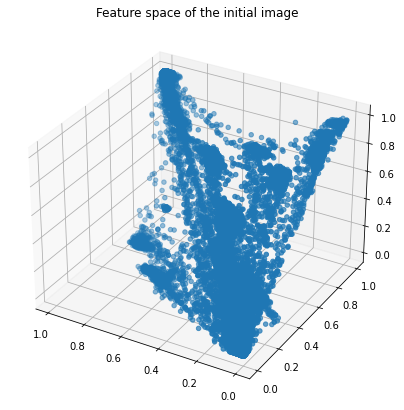

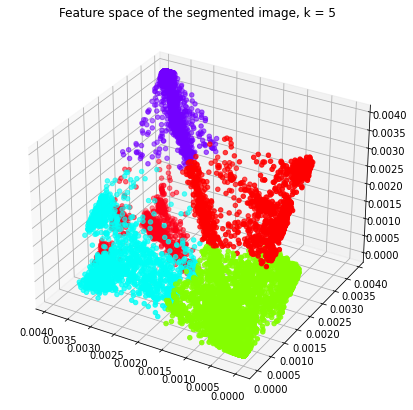

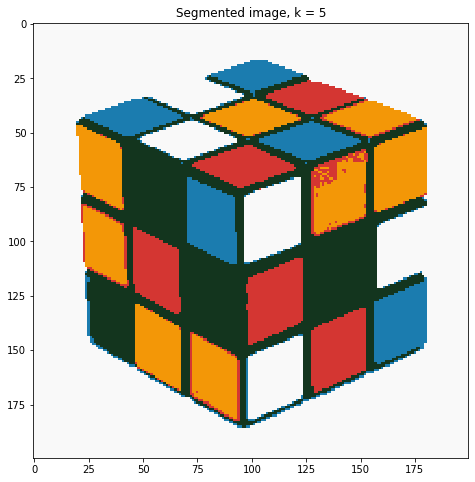

In [5]:
img1 = cv2.imread("input1.jpg")
plot3D(img1, None, 'hsv', "Feature space of the initial image")

k = 5 # number of centers
iterations = 10
result, labels, segmented_image = process_image(img1)

plot3D(result, labels, 'hsv', "Feature space of the segmented image, k = %s" %k)

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.imshow(segmented_image, interpolation="Nearest")
ax.set_title("Segmented image, k = %s" %k)

Text(0.5, 1.0, 'Segmented image, k = 5')

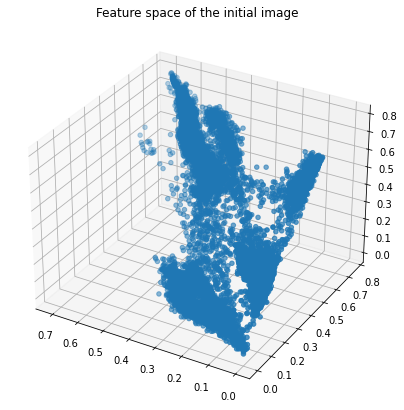

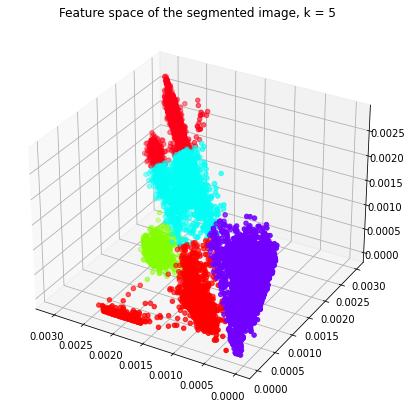

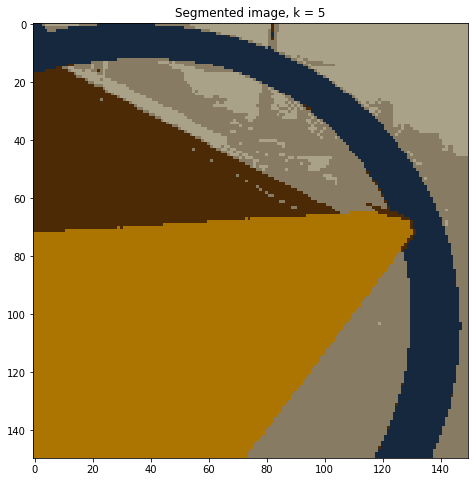

In [6]:
img2 = cv2.imread("input2.jpg")
plot3D(img2, None, 'hsv', "Feature space of the initial image")

k = 5 # number of centers
iterations = 10
result, labels, segmented_image = process_image(img2)

plot3D(result, labels, 'hsv', "Feature space of the segmented image, k = %s" %k)

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.imshow(segmented_image, interpolation="Nearest")
ax.set_title("Segmented image, k = %s" %k)